# Project: An investigation into a TMDB dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

---
For this project I have chosen to look at the TMDB dataset. This data was provided as part of the Udacity Data Analysis Nanodegree and originated from [Kaggle](https://www.kaggle.com/tmdb/tmdb-movie-metadata). It was originally sourced from IMDB but was replaced after takedown request.

_Questions_:

1. Which genres are most popular from year to year?
2. What kinds of properties are associated with films that have high revenues?

---

In [1]:
import pandas as pd
import numpy as np
% matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
# Stop floats from displaying as scientific notation
pd.options.display.float_format = '{:20,.2f}'.format

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
# types and look for instances of missing or possibly errant data.
movies = pd.read_csv('tmdb-movies.csv')

#### High level view of the dataset
----
In this section I'll take an initial view of the data - this will also include the number of rows, the datatypes and the number of non-null values in those columns. I'll also take a look at the number of unique values for those columns.

---

In [3]:
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,"137,999,939.28","1,392,445,892.52"
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,"137,999,939.28","348,161,292.49"
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,"101,199,955.47","271,619,025.41"
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,"183,999,919.04","1,902,723,129.80"
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,"174,799,923.09","1,385,748,801.47"


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

---
A view of the number of unique values in the columns:

---

In [5]:
movies.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

---
The next cell is used to sort by different columns names (_just replace the column name to get a look at the NaN data or see if there was any 0s_).

---

In [6]:
null_check = movies.loc[:, ['id', 'budget_adj']].sort_values(by=['budget_adj'], ascending=True)
null_check.head()

,id,budget_adj
5329,9611,0.00
3838,65256,0.00
3837,64854,0.00
3836,70574,0.00
3835,75964,0.00


#### Confirm ambiguous datatypes
---
A confirmation of the datatypes for all columns described above as 'object'.

---

In [7]:
print("I am imdb_id: ", type(movies['imdb_id'][0]))
print("I am original_title: ", type(movies['original_title'][0]))
print("I am cast: ", type(movies['cast'][0]))
print("I am homepage: ", type(movies['homepage'][0]))
print("I am director: ", type(movies['director'][0]))
print("I am tagline: ", type(movies['tagline'][0]))
print("I am keywords: ", type(movies['keywords'][0]))
print("I am overview: ", type(movies['overview'][0]))
print("I am genres: ", type(movies['genres'][0]))
print("I am production_companies: ", type(movies['production_companies'][0]))
print("I am release_date: ", type(movies['release_date'][0]))

I am imdb_id:  <class 'str'>
I am original_title:  <class 'str'>
I am cast:  <class 'str'>
I am homepage:  <class 'str'>
I am director:  <class 'str'>
I am tagline:  <class 'str'>
I am keywords:  <class 'str'>
I am overview:  <class 'str'>
I am genres:  <class 'str'>
I am production_companies:  <class 'str'>
I am release_date:  <class 'str'>


#### Initial thoughts on the data so far
---
_Null/Missing Values_

Some colums are missing data. For the genres-based question, the Nulls in the **genres** column will need to be removed.

While looking at null rows, I noticed that a number of columns have 0:
* popularity
* budget
* revenue
* runtime
* budget_adj
* revenue_adj

Most of these would need to be removed from the data (particularly in relation to the second main question of this analysis). However, in the context of the genres-based question, 0 value for popularity is a valid metric given how this is aggregated (definition is located [here](https://developers.themoviedb.org/3/getting-started/popularity))

_Uniques_

For columns like 'id' and 'original_title' I would expect these to be unique all the way through. A closer inspection of these rows is needed to decide on the action.

_Datatypes_

On the face of it, the only real issue is with release_date. For proper interogation, this will need converting from a string to a datetime object.

#### Closer look at the duplications
---

This section will look at the several hundred film title dupes and the single ID duplication.

---

In [8]:
# create an extra column and mark a row as True where a duplicate itle is found
movies['is_duplicate_title'] = movies.duplicated(['original_title'])

In [9]:
# filter anything that is True
movies_dupe_title_filter = movies[movies['is_duplicate_title'] == True]

In [10]:
movies_dupe_title_filter

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,is_duplicate_title
1133,281778,tt3297792,0.19,0,0,Survivor,Danielle Chuchran|Kevin Sorbo|Rocky Myers|Ruby...,http://www.arrowstormentertainment.com/#!survi...,John Lyde,Alone. Stranded. Deadly,...,93,Science Fiction|Action|Fantasy,Arrowstorm Entertainment,7/22/14,23,4.90,2014,0.00,0.00,True
1194,296626,tt3534842,0.13,0,0,Finders Keepers,Jaime Pressly|Kylie Rogers|Tobin Bell|Patrick ...,NaN,Alexander Yellen,NaN,...,85,Mystery|Thriller|Horror,HFD Productions|Hybrid LLC,10/18/14,33,4.80,2014,0.00,0.00,True
1349,42222,tt0076245,0.40,0,0,Julia,Jane Fonda|Vanessa Redgrave|Jason Robards|Maxi...,NaN,Fred Zinnemann,"Through It All, Friendship Prevailed.",...,117,Drama,Twentieth Century Fox Film Corporation,10/2/77,10,5.00,1977,0.00,0.00,True
1440,7445,tt0765010,1.22,26000000,43318349,Brothers,Tobey Maguire|Jake Gyllenhaal|Natalie Portman|...,NaN,Jim Sheridan,There are two sides to every family.,...,104,Drama|Thriller|War,Lionsgate|Relativity Media|Sighvatsson Films|M...,1/27/09,381,6.70,2009,"26,426,411.29","44,028,788.73",True
1513,62320,tt1014762,0.69,0,0,Home,Glenn Close|Yann Arthus-Bertrand|Jacques Gambl...,http://www.homethemovie.org/,Yann Arthus-Bertrand,A Stunning Visual Portrayal of Earth,...,95,Documentary,Europa Corp.|ElzÃ©vir Films|France 2 (FR2),6/3/09,109,7.80,2009,0.00,0.00,True
1707,79896,tt1336006,0.31,0,0,The Revenant,Chris Wylde|David Anders|Louise Griffiths|Jacy...,http://www.therevenantmovie.com/,D. Kerry Prior,What could be worse than having your best frie...,...,110,Comedy|Horror,Putrefactory Limited|Wanko Toys,8/16/09,30,5.50,2009,0.00,0.00,True
1753,36465,tt0992993,0.25,0,0,Into the Storm,Brendan Gleeson|Iain Glen|James D'Arcy|Janet M...,http://www.hbo.com/movies/into-the-storm/index...,Thaddeus O'Sullivan,NaN,...,100,Drama|History|Foreign,NaN,5/31/09,13,5.80,2009,0.00,0.00,True
1757,21398,tt1220213,0.32,5000000,0,Grace,Jordan Ladd|Samantha Ferris|Gabrielle Rose|Ste...,NaN,Paul Solet,Love. Undying.,...,94,Horror|Thriller,ArieScope Pictures|Dark Eye Entertainment|Leom...,8/14/09,21,4.90,2009,"5,082,002.17",0.00,True
1865,220903,tt1533395,0.10,0,0,Life,David Attenborough|Oprah Winfrey,http://www.bbc.co.uk/programmes/b00lbpcy,Martha Holmes|Simon Blakeney|Stephen Lyle,From the Makers of Planet Earth,...,500,Documentary,British Broadcasting Corporation (BBC),12/14/09,24,7.00,2009,0.00,0.00,True
2036,41505,tt1179069,0.79,22000000,851517,Shelter,Julianne Moore|Jonathan Rhys Meyers|Jeffrey De...,http://www.shelter-movie.jp/index.html,BjÃ¶rn Stein|MÃ¥ns MÃ¥rlind,Evil will rise.,...,112,Horror|Mystery|Thriller,NALA Films|IM Global|Maraci/Edelstein Films|Sh...,3/27/10,112,5.50,2010,"22,000,000.00","851,517.00",True


In [11]:
# use this cell to spot check titles for differences
movies_title_check = movies[movies['original_title'] == 'Robin Hood']
movies_title_check.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,is_duplicate_title
1938,20662,tt0955308,2.12,200000000,310669540,Robin Hood,Russell Crowe|Cate Blanchett|Mark Strong|Oscar...,http://www.robinhoodthemovie.com/,Ridley Scott,"Rise and rise again, until lambs become lions.",...,140,Action,Imagine Entertainment|Universal Pictures|Scott...,5/12/10,844,6.10,2010,"200,000,000.00","310,669,540.00",False
10593,11886,tt0070608,2.27,15000000,32056467,Robin Hood,Brian Bedford|Phil Harris|Peter Ustinov|Pat Bu...,NaN,Wolfgang Reitherman,Meet Robin Hood and his MERRY MENagerie!,...,83,Animation|Family,Walt Disney Productions,11/8/73,641,6.90,1973,"73,667,393.68","157,434,424.97",True


---
Upon inspection, it seems that duplicate film titles can be considered different films that have the same name.

The same process is applied for the duplicate ID. Since there is only one duplicate ID, there is no need to create a csv.

---

In [12]:
movies['is_duplicate_id'] = movies.duplicated(['id'])

In [13]:
movies_dupe_id_filter = movies[movies['is_duplicate_id'] == True]

In [14]:
movies_dupe_id_filter.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,is_duplicate_title,is_duplicate_id
2090,42194,tt0411951,0.60,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.00,2010,"30,000,000.00","967,000.00",True,True


---
Now that I have the duplicate ID (and given that the original_title duplicates appear to be different films with the same title), this is a final sense check to make sure the entire row is a duplicate:

---

In [15]:
movies_id_check_dupe = movies[movies['id'] == 42194]
movies_id_check_dupe.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,is_duplicate_title,is_duplicate_id
2089,42194,tt0411951,0.60,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.00,2010,"30,000,000.00","967,000.00",False,False
2090,42194,tt0411951,0.60,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.00,2010,"30,000,000.00","967,000.00",True,True


---
Drop the duplicated ID row from the main dataframe:

---

In [16]:
movies.drop_duplicates(subset=['id'],inplace=True)

### Data Cleaning (Replace this with more specific notes!)

In [17]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

#### Drop columns:
---
In this section, I've decided to drop columns that are extraneous to both questions in the analysis: 
* **imdb_id**: this appears to relate to the previous IMDB data. Assumption is that this was left in by Kaggle to map the IMDB and TMDB ids together
* **budget** and **revenue**: since budget_adj and revenue_adj have already been normalised to 2010 levels for more direct comparision, these two columns are no longer required
* **homepage**, **tagline**, **overview** and **keywords**: seem unnecessary to include this for the type of intended analysis
* **is_duplicate_title**: is no longer necessary
* **is_duplicate_id**: is no longer necessary

---

In [18]:
movies.drop(['imdb_id', 'budget', 'revenue', 'homepage', 'tagline', 'overview', 'keywords', 'is_duplicate_title', 'is_duplicate_id'], axis=1, inplace=True)

In [19]:
movies.head(1)

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.99,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,"137,999,939.28","1,392,445,892.52"


#### Update the datatypes
---

This section will look to change the **release_date** from a string to a datetime object.

---

In [20]:
movies['release_date'] = pd.to_datetime(movies['release_date'])

In [21]:
# check it's worked
type(movies['release_date'][0])

pandas._libs.tslib.Timestamp

#### Deal with null values
---

_This section will look to drop rows with null values._ For **runtime**, **budget_adj** and **revenue_adj**, 0 values are also considered null.

For the first 'Genres' based question in the introduction, I will look create a dataframe that cleans out null genres, and drops extraneous columns. This should return me the most number of intact rows suitable for that exploration.

For the question that looks at the types of properties associcated with high revenue movies, I will wish to keep some of the dropped columns for that analysis - therefore, I will use a separate dataframe. and then clean out the 0 values for budget_adj and revenue_adj.

---

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: Which genres are most popular from year to year?

---
In this section we will look to address the question: "Which genres are the most popular from year to year?". To approach this, we need to set some definitions:

* **Popularity**: TMDB have an aggregated metric, *popularity*, which combines a number of aspects as defined [here](https://developers.themoviedb.org/3/getting-started/popularity), in their API documentation.
* **Most popular**: at what point do we consider a genre to be a threshold to be termed most popular?

---

In [22]:
# prepare dataframe for question 1
movie_genres = movies.copy()
movie_genres.drop(['original_title', 'cast', 'director', 'runtime', 'release_date', 'production_companies', 'vote_count', 'vote_average','budget_adj', 'revenue_adj'], axis=1, inplace=True)
movie_genres.head(1)

,id,popularity,genres,release_year
0,135397,32.99,Action|Adventure|Science Fiction|Thriller,2015


In [23]:
# drop NaN values - only targets genres at this stage
movie_genres.dropna(axis=0, how='any', inplace=True)

---
Some of the rows in the **genres** column hold a multiple values. To begin using the information in this column effectively, I need to:

* know how many unique genres labels there are; and
* split these genres out into such a way that they can be considered individually

The next set of cells will address this.

---

In [24]:
# grab the id and genres column
genre = movie_genres.loc[:, ['id', 'genres']]
genre.head(5)

,id,genres
0,135397,Action|Adventure|Science Fiction|Thriller
1,76341,Action|Adventure|Science Fiction|Thriller
2,262500,Adventure|Science Fiction|Thriller
3,140607,Action|Adventure|Science Fiction|Fantasy
4,168259,Action|Crime|Thriller


In [25]:
# split the genres cells by the pipe and add to a list
genre_list = genre['genres'].str.split('|').tolist()
genre_list[:5]

[['Action', 'Adventure', 'Science Fiction', 'Thriller'],
 ['Action', 'Adventure', 'Science Fiction', 'Thriller'],
 ['Adventure', 'Science Fiction', 'Thriller'],
 ['Action', 'Adventure', 'Science Fiction', 'Fantasy'],
 ['Action', 'Crime', 'Thriller']]

---
The next set of code cells will look to bring this list back into a useable dataframe. (The very first code cell was added retrospectively to correct an error with the successive code cell).

---

In [26]:
# loop through each iterable (a nested list) in genre_list
# check that each element is indeed a list
# convert to list if not

for i in range(len(genre_list)):
    if not isinstance(genre_list[i], list):
        genre_list[i] = [genre_list[i]]
        
# an error occured when the cell below was first run, hence loop

In [27]:
"""
This cell creates a new dataframe using genre_list and the id column 
of the 'genre' dataframe as the index. As this will result in
multiple columns with an individual genre value per id, we need
to apply .stack() to pivot the data:
https://pandas.pydata.org/pandas-docs/stable/reshaping.html
"""
stacked_genre = pd.DataFrame(genre_list, index=genre['id']).stack()

In [28]:
print(stacked_genre.head())

id       
135397  0             Action
        1          Adventure
        2    Science Fiction
        3           Thriller
76341   0             Action
dtype: object


In [29]:
# since id has become the index, I want to reset this
stacked_genre = stacked_genre.reset_index()

In [30]:
print(stacked_genre.head())

       id  level_1                0
0  135397        0           Action
1  135397        1        Adventure
2  135397        2  Science Fiction
3  135397        3         Thriller
4   76341        0           Action


In [31]:
# get rid of level_1 column
stacked_genre = stacked_genre.loc[:, ['id', 0]]

In [32]:
print(stacked_genre.head())

       id                0
0  135397           Action
1  135397        Adventure
2  135397  Science Fiction
3  135397         Thriller
4   76341           Action


In [33]:
# rename columns
stacked_genre.columns = ['id', 'genre']

In [34]:
print(stacked_genre.head())

       id            genre
0  135397           Action
1  135397        Adventure
2  135397  Science Fiction
3  135397         Thriller
4   76341           Action


In [35]:
# merge stacked_genre and movie_genres and drop columns we don't need
merged_df = pd.merge(movie_genres, stacked_genre, on='id', how='left')
merged_df.drop(['genres', 'id'], axis=1, inplace=True)

In [36]:
merged_df.head()

,popularity,release_year,genre
0,32.99,2015,Action
1,32.99,2015,Adventure
2,32.99,2015,Science Fiction
3,32.99,2015,Thriller
4,28.42,2015,Action


---

We can see from the above dataframe snippet that we have broken out the genres against the release year and popularity values. Next I want a view on all of the different genre types in the data and the relative frequencies in which they occur.

---

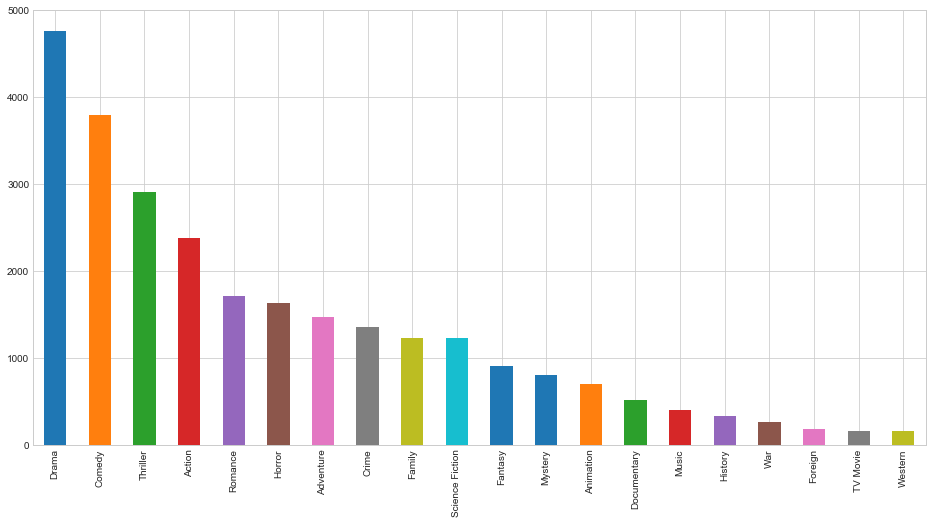

In [37]:
merged_df['genre'].value_counts().plot(kind='bar', figsize=(16, 8));

---

From the above chart, we can see all the different genre types and the frequency in which that type occurs in the data. The next process is to consider how to organise the data to 

To do this, we take the genres and group by the release year while calculating the mean popularity in that group. That way we can view the relationship between annual average popularity per genre across the years available.

---

In [38]:
def group_years(genre_name):
    """
    This function takes in a string that identifies the target
    column in merged_df, groups the data by release_year and 
    calculates the average popularity. It then returns a dataframe
    with two columns: release_year and the avergae popularity of the 
    input genre.
    """
    # filter for the genre value that we are targetting;
    # makes a copy df so that pandas doesn't issue a 
    # warning on the next operation
    genre = merged_df[merged_df['genre'] == genre_name].copy()
    # drop the genre column as it's now extraneous
    genre.drop(['genre'], axis=1, inplace=True)
    # group by release_year and calculate the mean
    popularity_mean = genre.groupby(['release_year']).mean().reset_index()
    # rename the popularity column to include the genre name
    popularity_mean.rename(columns={'popularity':'popularity_' + genre_name.lower()}, inplace=True)
    return popularity_mean

In [39]:
# run the function against all the genre columns
# and store against a variable
drama_popularity = group_years('Drama')
comedy_popularity = group_years('Comedy')
thriller_popularity = group_years('Thriller')
action_popularity = group_years('Action')
romance_popularity = group_years('Romance')
horror_popularity = group_years('Horror')
adventure_popularity = group_years('Adventure')
crime_popularity = group_years('Crime')
family_popularity = group_years('Family')
scifi_popularity = group_years('Science Fiction')
fantasy_popularity = group_years('Fantasy')
mystery_popularity = group_years('Mystery')
animation_popularity = group_years('Animation')
documentary_popularity = group_years('Documentary')
music_popularity = group_years('Music')
history_popularity = group_years('History')
war_popularity = group_years('War')
foreign_popularity = group_years('Foreign')
tv_popularity = group_years('TV Movie')
western_popularity = group_years('Western')

Merge all of the above into a new dataframe to plot the lines.

TODO: See if I can reduce this to a function

In [40]:
# Step through and merge each one in turn into a single df
genre_merge = pd.merge(drama_popularity, comedy_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, thriller_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, action_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, romance_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, horror_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, adventure_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, crime_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, family_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, scifi_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, fantasy_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, mystery_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, animation_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, documentary_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, music_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, history_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, war_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, foreign_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, tv_popularity, on='release_year', how='left')
genre_merge = pd.merge(genre_merge, western_popularity, on='release_year', how='left')
# check the first result to see that we have all the expected columns
genre_merge.head(1)

,release_year,popularity_drama,popularity_comedy,popularity_thriller,popularity_action,popularity_romance,popularity_horror,popularity_adventure,popularity_crime,popularity_family,...,popularity_fantasy,popularity_mystery,popularity_animation,popularity_documentary,popularity_music,popularity_history,popularity_war,popularity_foreign,popularity_tv movie,popularity_western
0,1960,0.57,0.40,0.81,0.59,0.54,0.59,0.70,0.35,0.28,...,0.43,nan,nan,nan,0.42,0.41,0.23,0.19,nan,0.57


---

To begin comparing the data, I have chosen to view these on a line plot. Since rendering 20 lines on a single graph may be difficult to view clearly, I have split these into 5 initial plots. To decide on which to initially show together, I have taken the 20 genres in the bar graph, divided them equally into 5 before selecting the 1st from each group for my first line plot, the 2nd from each group for my second line plot, and so on.

---

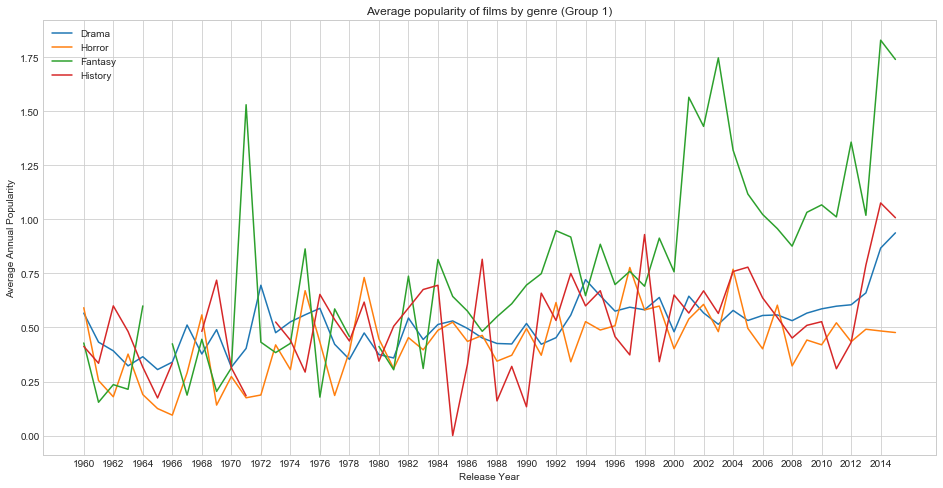

In [41]:
# group 1: drama, horror, fantasy and history
fig, ax = plt.subplots(figsize=(16, 8))
plt.title('Average popularity of films by genre (Group 1)')
plt.ylabel('Average Annual Popularity')
plt.xlabel('Release Year')
plt.xticks(np.arange(1960, 2016, 2))
ax.plot('release_year', 'popularity_drama', data=genre_merge, label="Drama")
ax.plot('release_year', 'popularity_horror', data=genre_merge, label="Horror")
ax.plot('release_year', 'popularity_fantasy', data=genre_merge, label="Fantasy")
ax.plot('release_year', 'popularity_history', data=genre_merge, label="History")
ax.legend(loc='upper left');

---

### Group 1

The first standout is the fantasy genre, with some early peaks and a strong trend upwards from around 1987. The other three are not so clear, though the drama genre has generally climbed steadily and more smoothly in popularity since the beginning. Horror, while generally climbing in popularity across the years, starts to begin a decline around 1998.

---

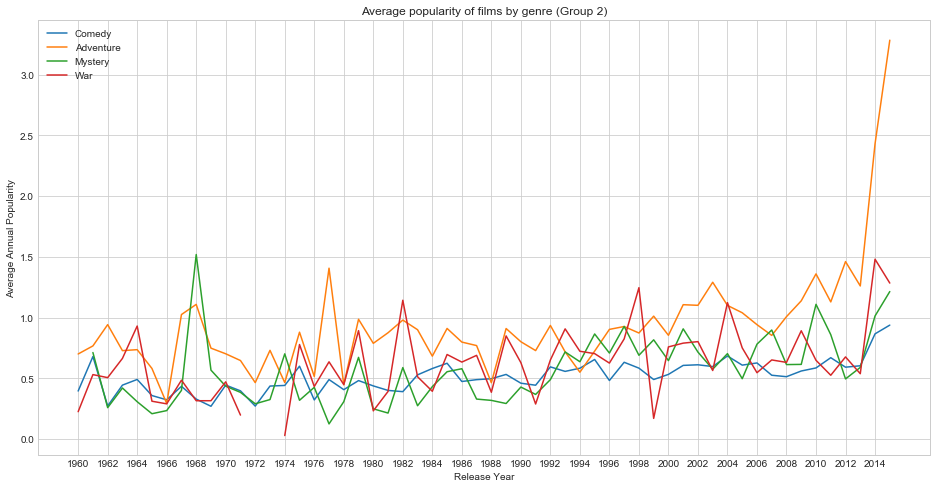

In [42]:
# group 2: comedy, adventure, mystery, war
fig, ax = plt.subplots(figsize=(16, 8))
plt.title('Average popularity of films by genre (Group 2)')
plt.ylabel('Average Annual Popularity')
plt.xlabel('Release Year')
plt.xticks(np.arange(1960, 2016, 2))
ax.plot('release_year', 'popularity_comedy', data=genre_merge, label="Comedy")
ax.plot('release_year', 'popularity_adventure', data=genre_merge, label="Adventure")
ax.plot('release_year', 'popularity_mystery', data=genre_merge, label="Mystery")
ax.plot('release_year', 'popularity_war', data=genre_merge, label="War")
ax.legend(loc='upper left');

In [43]:
# compare close line graphs
genre_merge.loc[:, ['popularity_mystery', 'popularity_war']].mean()

popularity_mystery                   0.57
popularity_war                       0.63
dtype: float64

---

### Group 2

Comedy appears to be the least popular within this group and generally tracks below adventure and war. Mystery has a strong peak in 1968, but can be seen to be less popular than adventure and of a comparable popularity with war.

---

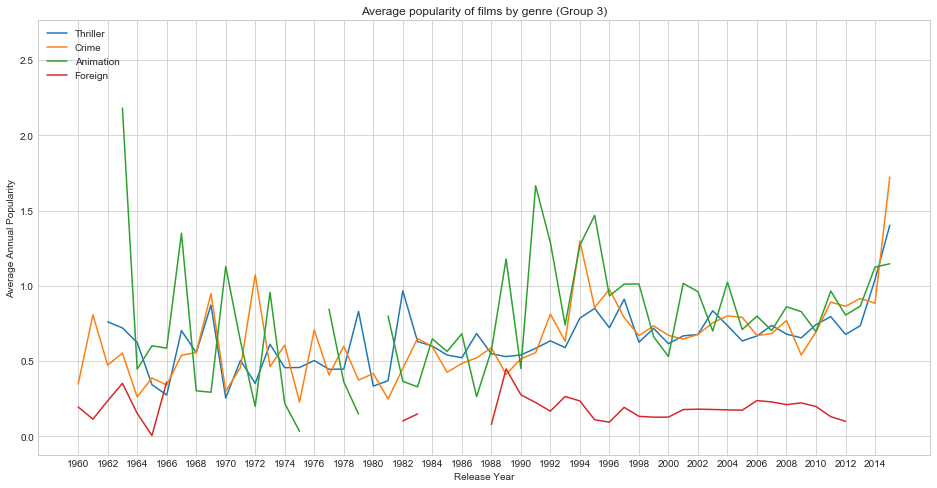

In [44]:
# group 3: thriller, crime, animation, foreign
fig, ax = plt.subplots(figsize=(16, 8))
plt.title('Average popularity of films by genre (Group 3)')
plt.ylabel('Average Annual Popularity')
plt.xlabel('Release Year')
plt.xticks(np.arange(1960, 2016, 2))
ax.plot('release_year', 'popularity_thriller', data=genre_merge, label="Thriller")
ax.plot('release_year', 'popularity_crime', data=genre_merge, label="Crime")
ax.plot('release_year', 'popularity_animation', data=genre_merge, label="Animation")
ax.plot('release_year', 'popularity_foreign', data=genre_merge, label="Foreign")
ax.legend(loc='upper left');

In [45]:
# compare close line graphs
genre_merge.loc[:, ['popularity_thriller', 'popularity_crime']].mean()

popularity_thriller                   0.65
popularity_crime                      0.64
dtype: float64

---

### Group 3

The lack of data points makes the foreign genre hard to compare, so for this analysis we will dicsount it. Animation also lacks some data points around the early 1960s and sporadically between 1975 and 1981, however where it does occur it gives a strong indication that this is a popular genre. Thriller and crime generally track quite similarly to each other, with thriller edging only slightly above.

---

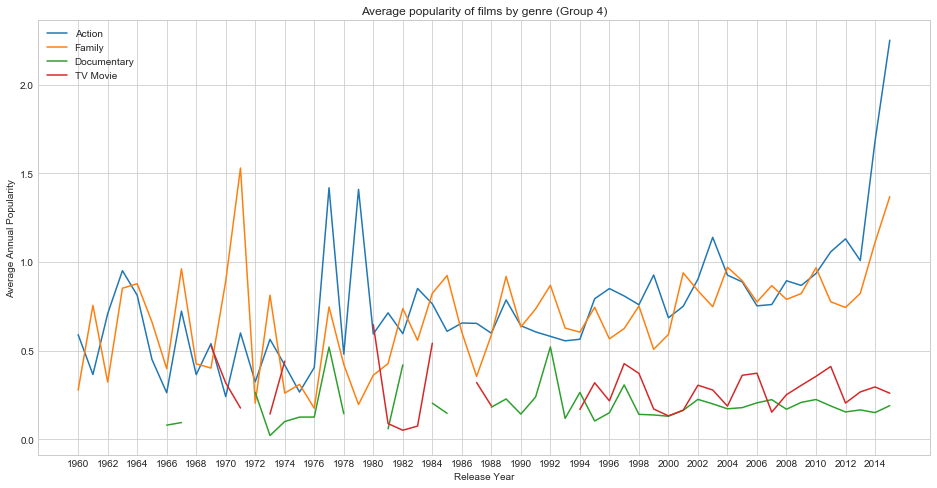

In [46]:
# group 4: action, family, documentary, tv movie
fig, ax = plt.subplots(figsize=(16, 8))
plt.title('Average popularity of films by genre (Group 4)')
plt.ylabel('Average Annual Popularity')
plt.xlabel('Release Year')
plt.xticks(np.arange(1960, 2016, 2))
ax.plot('release_year', 'popularity_action', data=genre_merge, label="Action")
ax.plot('release_year', 'popularity_family', data=genre_merge, label="Family")
ax.plot('release_year', 'popularity_documentary', data=genre_merge, label="Documentary")
ax.plot('release_year', 'popularity_tv movie', data=genre_merge, label="TV Movie")
ax.legend(loc='upper left');

In [47]:
# compare close line graphs
genre_merge.loc[:, ['popularity_action', 'popularity_family']].mean()

popularity_action                   0.76
popularity_family                   0.69
dtype: float64

---

### Group 4

Again, we have a situation where some genres (documentary and tv movie) are lacking too many data points, though even with the data we have, they are tracking low against the others. Action and family are both strong in this group, with action (when comparing the average popularity of both genres across all years) suggesting to be more popular with audiences overall.

---

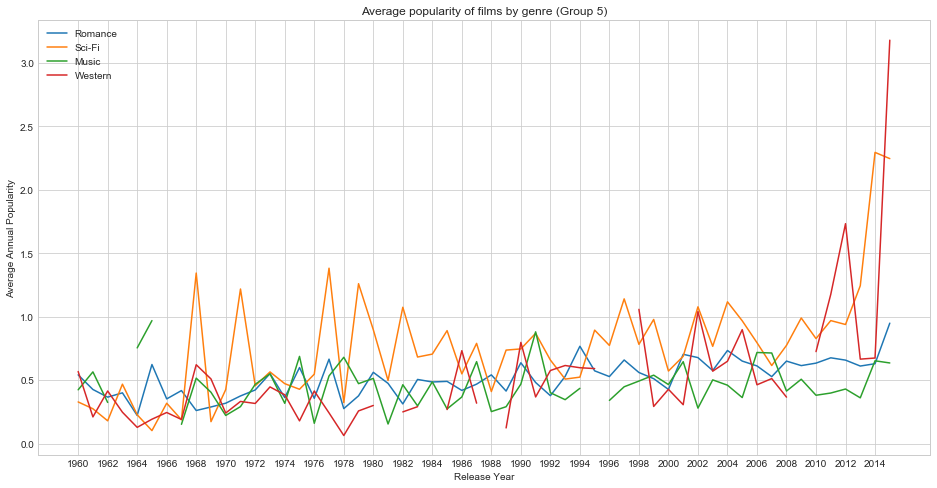

In [48]:
# group 5: romance, sci-fi, music, western
fig, ax = plt.subplots(figsize=(16, 8))
plt.title('Average popularity of films by genre (Group 5)')
plt.ylabel('Average Annual Popularity')
plt.xlabel('Release Year')
plt.xticks(np.arange(1960, 2016, 2))
ax.plot('release_year', 'popularity_romance', data=genre_merge, label="Romance")
ax.plot('release_year', 'popularity_science fiction', data=genre_merge, label="Sci-Fi")
ax.plot('release_year', 'popularity_music', data=genre_merge, label="Music")
ax.plot('release_year', 'popularity_western', data=genre_merge, label="Western")
ax.legend(loc='upper left');

In [49]:
# compare close line graphs
genre_merge.loc[:, ['popularity_romance', 'popularity_music']].mean()

popularity_romance                   0.51
popularity_music                     0.46
dtype: float64

---

### Group 5

Science fiction is the strongest contender in this group, while the western genre has too many data points missing. While romance and music appear to track quite similarly on the graph, it is only when we also look at their overall popularity through the years that we see that romance is generally higher.

---

---

#### The Final Graph

The final graph will take a look at the most popular in each group and compare these together:

---

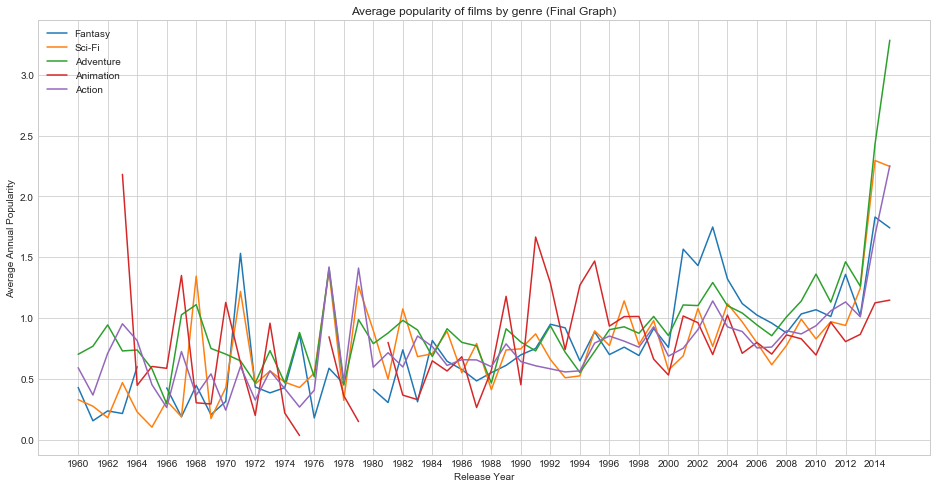

In [50]:
fig, ax = plt.subplots(figsize=(16, 8))
plt.title('Average popularity of films by genre (Final Graph)')
plt.ylabel('Average Annual Popularity')
plt.xlabel('Release Year')
plt.xticks(np.arange(1960, 2016, 2))
ax.plot('release_year', 'popularity_fantasy', data=genre_merge, label="Fantasy")
ax.plot('release_year', 'popularity_science fiction', data=genre_merge, label="Sci-Fi")
ax.plot('release_year', 'popularity_adventure', data=genre_merge, label="Adventure")
ax.plot('release_year', 'popularity_animation', data=genre_merge, label="Animation")
ax.plot('release_year', 'popularity_action', data=genre_merge, label="Action")
ax.legend(loc='upper left');

In [51]:
# compare close line graphs
genre_merge.loc[:, ['popularity_animation', 'popularity_action', 'popularity_science fiction', 'popularity_fantasy', 'popularity_adventure']].mean()

popularity_animation                         0.82
popularity_action                            0.76
popularity_science fiction                   0.76
popularity_fantasy                           0.76
popularity_adventure                         0.94
dtype: float64

TODO: write something about this last graph

### Research Question 2: What kinds of properties are associated with films that have high revenues?

In [52]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

In [53]:
# df_genres_test = df_genres[df_genres.release_year != 2015]
# use this later for dropping specific 0 values from budget_adj

In [54]:
# prepare dataframe for question 2
movies.head(5)

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.99,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.50,2015,"137,999,939.28","1,392,445,892.52"
1,76341,28.42,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.10,2015,"137,999,939.28","348,161,292.49"
2,262500,13.11,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.30,2015,"101,199,955.47","271,619,025.41"
3,140607,11.17,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.50,2015,"183,999,919.04","1,902,723,129.80"
4,168259,9.34,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.30,2015,"174,799,923.09","1,385,748,801.47"


In [55]:
cast_list = movies['cast'].str.split('|').tolist()
cast_list[:5]

[['Chris Pratt',
  'Bryce Dallas Howard',
  'Irrfan Khan',
  "Vincent D'Onofrio",
  'Nick Robinson'],
 ['Tom Hardy',
  'Charlize Theron',
  'Hugh Keays-Byrne',
  'Nicholas Hoult',
  'Josh Helman'],
 ['Shailene Woodley',
  'Theo James',
  'Kate Winslet',
  'Ansel Elgort',
  'Miles Teller'],
 ['Harrison Ford',
  'Mark Hamill',
  'Carrie Fisher',
  'Adam Driver',
  'Daisy Ridley'],
 ['Vin Diesel',
  'Paul Walker',
  'Jason Statham',
  'Michelle Rodriguez',
  'Dwayne Johnson']]

In [56]:
type(cast_list[0][0])

str

In [57]:
cast_list_two = []

def cast_list_func(x, empty_list):
    counter = 0
    for i in x:
        empty_list.append(x[counter][0])
        counter += 1

In [58]:
cast_list_func(cast_list, cast_list_two)

TypeError: 'float' object is not subscriptable

In [ ]:
cast_list_two[:5]

---



In [ ]:
# drop colums for question 2
movies.drop(['popularity', 'genres', 'production_companies', 'vote_count', 'vote_average', 'release_year'], axis=1, inplace=True)

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!